# EMA

- 가장 최근에 관찰된 가격에 더 많은 가중치를 둠
- 장기 추세가 변동성이 심한 단기 가격 움직임보다 더 많은 정보를 갖고 있다는 아이디어를 포착
- result: 미가공 가격의 잡음을 줄일 수 있다.
- 파라미터 N 이외에 ema에서 추가된 파라미터로 오래된 가격 관찰값들에 대한 새로운 가격 관찰값의 가중치 조절 가능

In [2]:
import pandas as pd
from pandas_datareader import data


In [3]:

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']


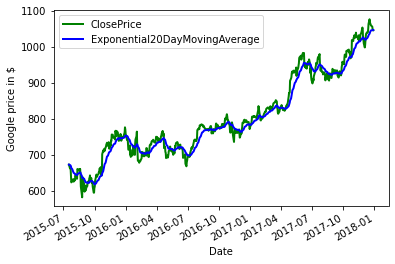

In [4]:
num_periods = 20             # 평균을 구하는 날짜 수
K = 2 / (num_periods + 1)    # 평활화 상수 ( 평활화 팩터는 디폴트 값 사용 )
ema_p = 0
ema_values = []              # 계산된 EMA값 보유 

for close_price in close:
  if (ema_p == 0):           # 첫 번째 관찰값 EMA = 현재 가격 
    ema_p = close_price
  else:
    ema_p = (close_price - ema_p) * K + ema_p

  ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.show()